### Creating Classification Data

In [760]:
from sklearn.datasets import make_classification
import numpy as np

In [761]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [762]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [763]:
import matplotlib.pyplot as plt

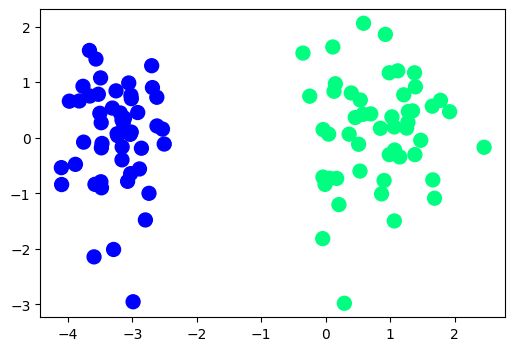

In [764]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [765]:
# X[:, 0] -> all values from the first col of X(input data)
# X[:, 1] -> all values from the second col of X

### Logistic Regressoin using Sklearn Library

In [766]:
from sklearn.linear_model import LogisticRegression

In [767]:
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [768]:
print(lor.coef_)
print(lor.intercept_)

[[4.78697234 0.20759692]]
[5.75786296]


In [769]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [770]:
print(m1)
print(b1)

-23.058976209245298
[-27.73578278]


In [771]:
# To plot classification line/boundary
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1

print(x_input1.shape)
print(y_input1.shape)

(100,)
(100,)


### Logistic Regression using Gradient Descent

In [772]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [773]:
def gd(X,y):

  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5

  for i in range(5000):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])

  return weights[1:],weights[0]


In [774]:
class CustomLogisticGD:

  def __init__(self,epochs,learning_rate):

    self.lr = learning_rate
    self.epochs = epochs
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    weights = np.ones(X_train.shape[1])

    for i in range(self.epochs):
      y_hat = sigmoid(np.dot(X_train, weights))
      weights = weights + self.lr*(np.dot((y_train-y_hat), X_train)/X_train.shape[0])

    self.coef_ = weights[1:]
    self.intercept_ = weights[0]

  def predict(self,X_test):
    pass

In [775]:
logGD = CustomLogisticGD(epochs=25000, learning_rate=0.083)

In [776]:
logGD.fit(X, y)

In [777]:
coef_,intercept_ = logGD.coef_, logGD.intercept_

In [778]:
print(coef_)
print(intercept_)

[4.7094441  0.20056359]
5.64714875271859


In [779]:
m2 = -(coef_[0]/coef_[1])
b2 = -(intercept_/coef_[1])

print(m2)
print(b2)

-23.48105177759287
-28.156400104726135


In [780]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input2 + b2

(-3.0, 2.0)

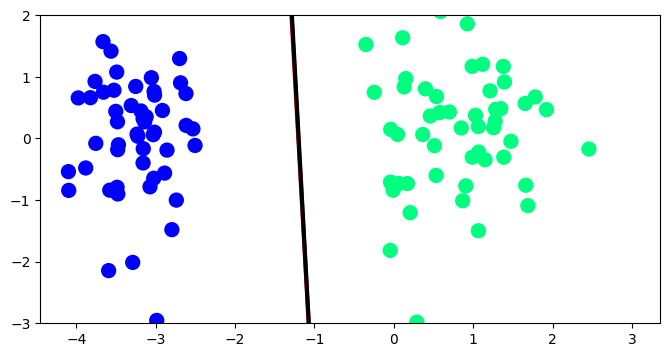

In [781]:
plt.figure(figsize=(8,4))
plt.plot(x_input1,y_input1,color='red',linewidth=3)
plt.plot(x_input2,y_input2,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [781]:
# epochs=25000, learning_rate=0.083
# epochs=25000, learning_rate=0.080
# epochs=25000, learning_rate=0.075